In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.stats import LombScargle
plt.style.use('seaborn-whitegrid')

from scipy import integrate
import astropy
from astropy.time import Time

import pyfits
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.stats import LombScargle
import matplotlib.ticker as ticker

import numpy as np
from numpy import cov,corrcoef
import matplotlib.pyplot as plt
import astropy.units as u
from scipy.optimize import curve_fit
import scipy
import scipy.stats as stats
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [32]:

from matplotlib import colors as mcolors

colors=dict(mcolors.BASE_COLORS,**mcolors.CSS4_COLORS)
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_color_names = [name for hsv, name in by_hsv]

marker1=['.','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']
color1=['red','sandybrown','tan','gold','olivedrab','chartreuse','darkgreen','blue','m','skyblue','violet','crimson','aqua','purple','magenta','yellow','lime','turquoise','lightcyan','teal','lightblue','indigo']
print(len(colors),len(marker1),len(color1))
marker3=marker1+marker1+marker1
color3=color1+color1+color1

print(len(marker3),len(color3))

156 23 22
69 66


In [8]:
def get_namelist(df,name):
    state=df[name]
    stateori=[]
    for i in state:
        if i not in stateori:
            stateori.append(i)
    return stateori

In [10]:
df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

df

,age,gender,name,num_children,num_pets,state
0,23,M,john,2,5,california
1,78,F,mary,0,1,dc
2,22,M,peter,0,0,california
3,19,M,jeff,3,5,dc
4,45,M,bill,2,2,california
5,33,F,lisa,1,2,texas
6,20,M,jose,4,3,texas


In [11]:
state=df[df['state']=='california']
state,df

(   age gender   name  num_children  num_pets       state
 0   23      M   john             2         5  california
 2   22      M  peter             0         0  california
 4   45      M   bill             2         2  california,
    age gender   name  num_children  num_pets       state
 0   23      M   john             2         5  california
 1   78      F   mary             0         1          dc
 2   22      M  peter             0         0  california
 3   19      M   jeff             3         5          dc
 4   45      M   bill             2         2  california
 5   33      F   lisa             1         2       texas
 6   20      M   jose             4         3       texas)

In [12]:
dfstack=df.stack().unstack()
dfstack,df

(  age gender   name num_children num_pets       state
 0  23      M   john            2        5  california
 1  78      F   mary            0        1          dc
 2  22      M  peter            0        0  california
 3  19      M   jeff            3        5          dc
 4  45      M   bill            2        2  california
 5  33      F   lisa            1        2       texas
 6  20      M   jose            4        3       texas,
    age gender   name  num_children  num_pets       state
 0   23      M   john             2         5  california
 1   78      F   mary             0         1          dc
 2   22      M  peter             0         0  california
 3   19      M   jeff             3         5          dc
 4   45      M   bill             2         2  california
 5   33      F   lisa             1         2       texas
 6   20      M   jose             4         3       texas)

In [145]:
#sorted_color_names

['california', 'dc', 'texas']


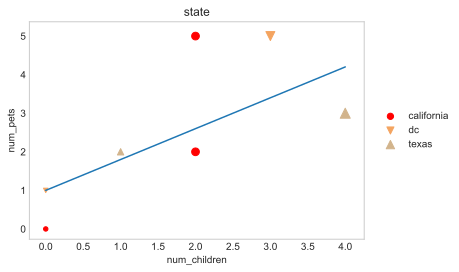

In [33]:



parax='num_children'
paray='num_pets'
paralist='state'
namelist=get_namelist(df,paralist)
print(namelist)

plt.figure()
for i,m,c,in zip(namelist,marker[:len(namelist)],color[:len(namelist)]):
    x=df[df[paralist]==i][parax]
    y=df[df[paralist]==i][paray]
    plt.scatter(x,y,marker=m,color=c,label=i,s=(x+1)*20)
plt.plot(np.arange(5),np.arange(5)*0.8+1)
plt.xlabel(parax)
plt.ylabel(paray)
plt.title(paralist)
plt.legend(loc='center', bbox_to_anchor=(1.15, 0.5))
plt.grid()
plt.show()

In [21]:
Name=df['name'].map(str.upper)
name=df['name'].map(str.lower)
print(Name)
print(name)


0     JOHN
1     MARY
2    PETER
3     JEFF
4     BILL
5     LISA
6     JOSE
Name: name, dtype: object
0     john
1     mary
2    peter
3     jeff
4     bill
5     lisa
6     jose
Name: name, dtype: object


69 66


In [22]:
Lrx=pd.read_csv('lrlx_data.csv')
Lrx

,Name,Class,Lr,Lr_ler,Lr_uer,Lx,Lx_ler,Lx_uer,uplim,Ref
0,A0620-00,BH,2.415711e+26,3.279963e+25,3.279963e+25,7.476976e+30,1.698887e+30,2.378977e+30,None,"Gallo et al. 2006, MNRAS, 370, 1351; Dincer et..."
1,A0620-00,BH,1.492718e+26,3.213025e+25,3.213025e+25,1.799294e+31,3.835548e+30,5.014996e+30,None,"Gallo et al. 2006, MNRAS, 370, 1351; Dincer et..."
2,XTE J1118+480,BH,1.011442e+29,0.000000e+00,0.000000e+00,2.062842e+35,0.000000e+00,0.000000e+00,None,"Fender et al. 2010, MNRAS, 406, 1425; Gallo et..."
3,XTE J1118+480,BH,9.855076e+28,0.000000e+00,0.000000e+00,2.097762e+35,0.000000e+00,0.000000e+00,None,"Fender et al. 2010, MNRAS, 406, 1425; Gallo et..."
4,XTE J1118+480,BH,7.676585e+28,0.000000e+00,0.000000e+00,1.761429e+35,0.000000e+00,0.000000e+00,None,"Fender et al. 2010, MNRAS, 406, 1425; Gallo et..."
5,XTE J1118+480,BH,6.863974e+28,0.000000e+00,0.000000e+00,1.049432e+35,0.000000e+00,0.000000e+00,None,"Fender et al. 2010, MNRAS, 406, 1425; Gallo et..."
6,XTE J1118+480,BH,4.737352e+28,0.000000e+00,0.000000e+00,7.009694e+34,0.000000e+00,0.000000e+00,None,"Fender et al. 2010, MNRAS, 406, 1425; Gallo et..."
7,XTE J1118+480,BH,4.114926e+28,0.000000e+00,0.000000e+00,4.528549e+34,0.000000e+00,0.000000e+00,None,"Fender et al. 2010, MNRAS, 406, 1425; Gallo et..."
8,XTE J1118+480,BH,3.215867e+28,0.000000e+00,0.000000e+00,2.326763e+34,0.000000e+00,0.000000e+00,None,"Fender et al. 2010, MNRAS, 406, 1425; Gallo et..."
9,XTE J1118+480,BH,6.915843e+27,0.000000e+00,0.000000e+00,6.983964e+33,0.000000e+00,0.000000e+00,None,"Fender et al. 2010, MNRAS, 406, 1425; Gallo et..."


In [203]:
def get_namelist(df,name):
    state=df[name]
    stateori=[]
    for i in state:
        if i not in stateori:
            stateori.append(i)
    return stateori


48

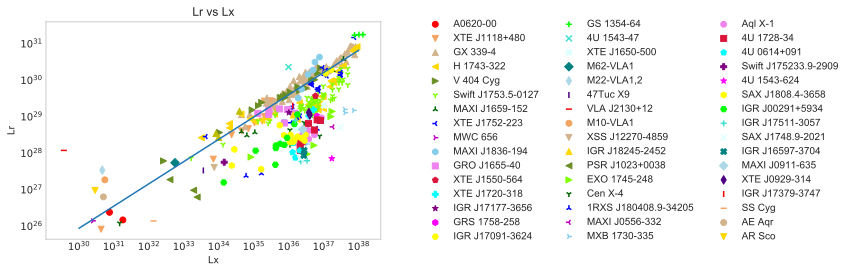

In [34]:
parax='Lx'
paray='Lr'
paralist='Name'
namelistall=get_namelist(Lrx,paralist)
namelist=namelistall[:]
#namelist=['V 404 Cyg']
Lr15=np.array([1.43e29,3.47e28,2.72e28])
Lx15=np.array([3.89e34,8.27e33,9.92e33])
len(namelistall)

plt.figure()
fit_x=np.logspace(30,38,base=10)
fit_y=pow(fit_x,0.61)*pow(10,29.65+0.15-0.61*36.32)

for i,m,c,in zip(namelist,marker[:len(namelist)],color[:len(namelist)]):
    x=Lrx[Lrx[paralist]==i][parax]
    y=Lrx[Lrx[paralist]==i][paray]
    plt.scatter(x,y,marker=m,color=c,label=i)#,s=(x+1)*20)
    plt.xscale('log')
    plt.yscale('log')
    
plt.plot(fit_x,fit_y)
plt.scatter(Lx15,Lr15,marker='^',color='y')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(parax)
plt.ylabel(paray)
plt.title('%s vs %s'%(paray,parax))
plt.legend(loc='center', bbox_to_anchor=(1.75, 0.5),ncol=3)
plt.grid()
plt.show()

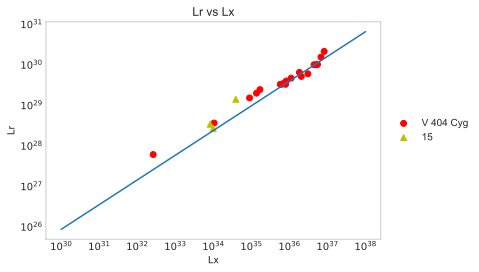

In [48]:
parax='Lx'
paray='Lr'
paralist='Name'
#namelistall=get_namelist(Lrx,paralist)
#namelist=namelistall[:]
namelist=['V 404 Cyg']
Lr15=np.array([1.43e29,3.47e28,2.72e28])
Lx15=np.array([3.89e34,8.27e33,9.92e33])
len(namelistall)

plt.figure()
fit_x=np.logspace(30,38,base=10)
fit_y=pow(fit_x,0.61)*pow(10,29.65+0.15-0.61*36.32)

for i,m,c,in zip(namelist,marker[:len(namelist)],color[:len(namelist)]):
    x=Lrx[Lrx[paralist]==i][parax]
    y=Lrx[Lrx[paralist]==i][paray]
    plt.scatter(x,y,marker=m,color=c,label=i)#,s=(x+1)*20)
    plt.xscale('log')
    plt.yscale('log')
    
plt.plot(fit_x,fit_y)
plt.scatter(Lx15,Lr15,marker='^',color='y',label='15')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(parax)
plt.ylabel(paray)
plt.title('%s vs %s'%(paray,parax))
plt.legend(loc='center', bbox_to_anchor=(1.15, 0.5),ncol=1)
plt.grid()
plt.show()

48


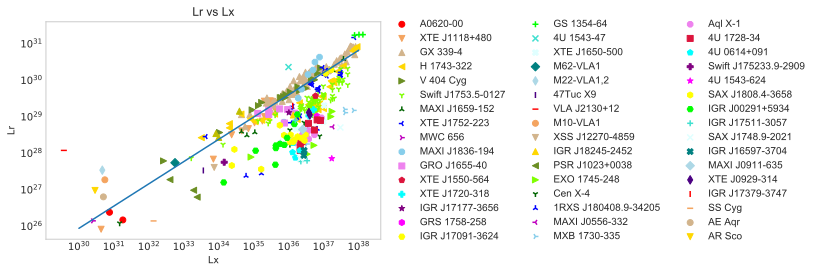

In [49]:
parax='Lx'
paray='Lr'
paralist='Name'
namelistall=get_namelist(Lrx,paralist)
namelist=namelistall[:]
#namelist=['V 404 Cyg']
print(len(namelistall))

plt.figure()
fit_x=np.logspace(30,38,base=10)
fit_y=pow(fit_x,0.61)*pow(10,29.65+0.15-0.61*36.32)

for i,m,c,in zip(namelist,marker[:len(namelist)],color[:len(namelist)]):
    x=Lrx[Lrx[paralist]==i][parax]
    y=Lrx[Lrx[paralist]==i][paray]
    plt.scatter(x,y,marker=m,color=c,label=i)#,s=(x+1)*20)
    plt.xscale('log')
    plt.yscale('log')
    
plt.plot(fit_x,fit_y)
plt.scatter(Lx15,Lr15,marker='^',color='y')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(parax)
plt.ylabel(paray)
plt.title('%s vs %s'%(paray,parax))
plt.legend(loc='center', bbox_to_anchor=(1.65, 0.5),ncol=3)
plt.grid()
plt.show()

7


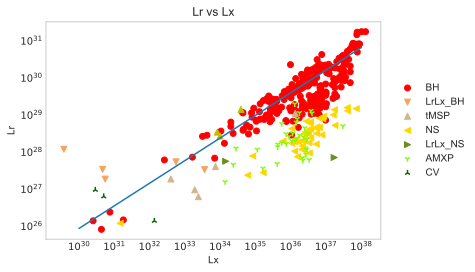

In [50]:
parax='Lx'
paray='Lr'
paralist='Class'
namelistall=get_namelist(Lrx,paralist)
print(len(namelistall))

namelist=namelistall[:]
#namelist=['V 404 Cyg']

plt.figure()
fit_x=np.logspace(30,38,base=10)
fit_y=pow(fit_x,0.61)*pow(10,29.65+0.15-0.61*36.32)

for i,m,c,in zip(namelist,marker[:len(namelist)],color[:len(namelist)]):
    x=Lrx[Lrx[paralist]==i][parax]
    y=Lrx[Lrx[paralist]==i][paray]
    plt.scatter(x,y,marker=m,color=c,label=i)#,s=(x+1)*20)
    plt.xscale('log')
    plt.yscale('log')
    
plt.plot(fit_x,fit_y)
plt.scatter(Lx15,Lr15,marker='^',color='y')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(parax)
plt.ylabel(paray)
plt.title('%s vs %s'%(paray,parax))
plt.legend(loc='center', bbox_to_anchor=(1.15, 0.5),ncol=1)
plt.grid()
plt.show()

In [38]:
Lrxodd=pd.read_csv('lrlx_odd_srcs.csv')
Lrxodd

,Name,Class,Lr,Lr_ler,Lr_uer,Lx,Lx_ler,Lx_uer,uplim,Ref
0,GRS 1915+105,BH,1.630000e+32,0.0,0.0,3.690000e+38,0.0,0.0,None,"Rushton et al. 2010, A&A, 524, 29"
1,GRS 1915+105,BH,1.470000e+32,0.0,0.0,3.280000e+38,0.0,0.0,None,"Rushton et al. 2010, A&A, 524, 29"
2,GRS 1915+105,BH,1.930000e+32,0.0,0.0,3.300000e+38,0.0,0.0,None,"Rushton et al. 2010, A&A, 524, 29"
3,GRS 1915+105,BH,1.390000e+32,0.0,0.0,3.350000e+38,0.0,0.0,None,"Rushton et al. 2010, A&A, 524, 29"
4,GRS 1915+105,BH,1.940000e+32,0.0,0.0,3.410000e+38,0.0,0.0,None,"Rushton et al. 2010, A&A, 524, 29"
5,GRS 1915+105,BH,1.450000e+32,0.0,0.0,3.440000e+38,0.0,0.0,None,"Rushton et al. 2010, A&A, 524, 29"
6,GRS 1915+105,BH,1.470000e+32,0.0,0.0,3.160000e+38,0.0,0.0,None,"Rushton et al. 2010, A&A, 524, 29"
7,GRS 1915+105,BH,1.280000e+32,0.0,0.0,2.970000e+38,0.0,0.0,None,"Rushton et al. 2010, A&A, 524, 29"
8,GRS 1915+105,BH,1.460000e+32,0.0,0.0,3.020000e+38,0.0,0.0,None,"Rushton et al. 2010, A&A, 524, 29"
9,GRS 1915+105,BH,1.320000e+32,0.0,0.0,3.020000e+38,0.0,0.0,None,"Rushton et al. 2010, A&A, 524, 29"


2


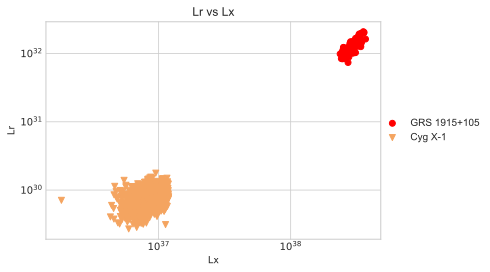

In [51]:
parax='Lx'
paray='Lr'
paralist='Name'
namelistall=get_namelist(Lrxodd,paralist)
print(len(namelistall))
namelist=namelistall[:]


plt.figure()
fit_x=np.logspace(29,38,base=10)
fit_y=pow(fit_x,0.61)*pow(10,29.65+0.15-0.61*36.32)

for i,m,c,in zip(namelist,marker[:len(namelist)],color[:len(namelist)]):
    x=Lrxodd[Lrxodd[paralist]==i][parax]
    y=Lrxodd[Lrxodd[paralist]==i][paray]
    plt.scatter(x,y,marker=m,color=c,label=i)#,s=(x+1)*20)
    plt.xscale('log')
    plt.yscale('log')
    
#plt.plot(fit_x,fit_y)

plt.xscale('log')
plt.yscale('log')
plt.xlabel(parax)
plt.ylabel(paray)
plt.title('%s vs %s'%(paray,parax))
plt.legend(loc='center', bbox_to_anchor=(1.15, 0.5),ncol=1)
plt.grid(True)
plt.show()

In [223]:
#pd.read_excel
#pd.read_csv
#pd.set_option('precision',10)


In [249]:
mutime=pd.read_excel('HM Cnc 08h06m22.9s +15d27m31s.xlsx')
mutime

,date,Time(mjd),P(s),Mu(mHz),Instrument,Paper,Valid
0,1994-1995,49648.9000000000,321.539300000,3.1100397000,ROSAT,Hakala2003,yes
1,2001-02,52226.2580000000,321.533520000,3.1100956000,VLT and NOT,Hakala2003,yes
2,2001-02,52281.4160000000,321.533140000,3.1100993000,VLT+NOT,Hakala2004,yes
3,2003,52619.0000000000,321.530382200,3.1101259900,Swift,Esposito2013,yes
4,2003,52645.4430000000,321.529570000,3.1101338000,NOT,Hakala2003,yes
5,2003,52649.5290000000,321.530070000,3.1101290000,NOT,Hakala2004,yes
6,2001-2004,53009.8899437530,NaN,3.1101382400,Chandra,Strohmayer05,yes
7,2004,53009.8899437530,NaN,3.1101425000,Chandra,Strohmayer05,yes
8,2003-2004,53030.3950000000,321.528320000,3.1101459000,INT+NOT,Hakala2004,yes
9,2005-06,53802.8044649643,321.518906100,3.1102370060,Chandra,Strohmayer08,no


11


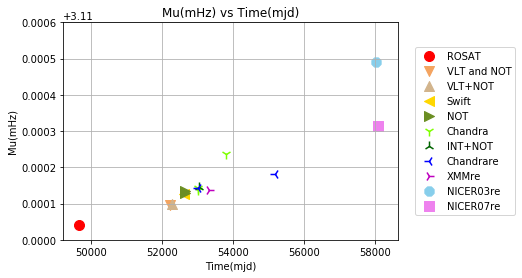

In [250]:
filename=mutime
parax='Time(mjd)'
paray='Mu(mHz)'
paralist='Instrument'
namelistall=get_namelist(filename,paralist)
print(len(namelistall))

namelist=namelistall[:]
#namelist=['V 404 Cyg']

plt.figure()
fit_x=np.logspace(30,38,base=10)
fit_y=pow(fit_x,0.61)*pow(10,29.65+0.15-0.61*36.32)

for i,m,c,in zip(namelist,marker[:len(namelist)],color[:len(namelist)]):
    x=filename[filename[paralist]==i][parax]
    y=filename[filename[paralist]==i][paray]
    plt.scatter(x,y,marker=m,color=c,label=i,s=100)#,s=(x+1)*20)
    plt.ylim(3.11,3.1106)
    #plt.xscale('log')
    #plt.yscale('log')
    
#plt.plot(fit_x,fit_y)
plt.xlabel(parax)
plt.ylabel(paray)
plt.title('%s vs %s'%(paray,parax))
plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5),ncol=1)
plt.grid()
plt.savefig('MutimeofHMCNC_instrument.png')
plt.show()

6


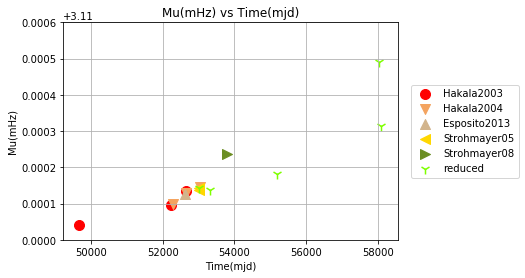

In [257]:
filename=mutime
parax='Time(mjd)'
paray='Mu(mHz)'
paralist='Paper'
namelistall=get_namelist(filename,paralist)
print(len(namelistall))

namelist=namelistall[:]
#namelist=['V 404 Cyg']

plt.figure()
fit_x=np.logspace(30,38,base=10)
fit_y=pow(fit_x,0.61)*pow(10,29.65+0.15-0.61*36.32)

for i,m,c,in zip(namelist,marker[:len(namelist)],color[:len(namelist)]):
    x=filename[filename[paralist]==i][parax]
    y=filename[filename[paralist]==i][paray]
    plt.scatter(x,y,marker=m,color=c,label=i,s=100)#,s=(x+1)*20)
    plt.ylim(3.11,3.1106)
    #plt.xscale('log')
    #plt.yscale('log')
    
#plt.plot(fit_x,fit_y)
plt.xlabel(parax)
plt.ylabel(paray)
plt.title('%s vs %s'%(paray,parax))
plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5),ncol=1)
plt.grid()
plt.savefig('MutimeofHMCNC_paper.png')
plt.show()

2


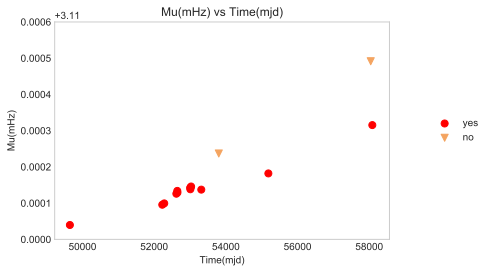

In [287]:
filename=mutime
parax='Time(mjd)'
paray='Mu(mHz)'
paralist='Valid'
namelistall=get_namelist(filename,paralist)
print(len(namelistall))

namelist=namelistall[:]
#namelist=['V 404 Cyg']

plt.figure()
fit_x=np.logspace(30,38,base=10)
fit_y=pow(fit_x,0.61)*pow(10,29.65+0.15-0.61*36.32)

for i,m,c,in zip(namelist,marker[:len(namelist)],color[:len(namelist)]):
    x=filename[filename[paralist]==i][parax]
    y=filename[filename[paralist]==i][paray]
    plt.scatter(x,y,marker=m,color=c,label=i,s=50)#,s=(x+1)*20)
    plt.ylim(3.11,3.1106)
    #plt.xscale('log')
    #plt.yscale('log')
    
#plt.plot(fit_x,fit_y)
plt.xlabel(parax)
plt.ylabel(paray)
plt.title('%s vs %s'%(paray,parax))
plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5),ncol=1)
plt.grid()
plt.savefig('MutimeofHMCNC_valid.png')
plt.show()

In [281]:
def mudotdottime(t,mudot,muzero,mudotdot):
    #mudotdot=0
    tzero=t[0]
    return muzero+(t-tzero)*mudot*86400+0.5*mudotdot*(t-tzero)**2*86400**2


def mudottime(t,mudot,muzero):
    #mudotdot=0
    tzero=t[0]
    return muzero+(t-tzero)*mudot*86400

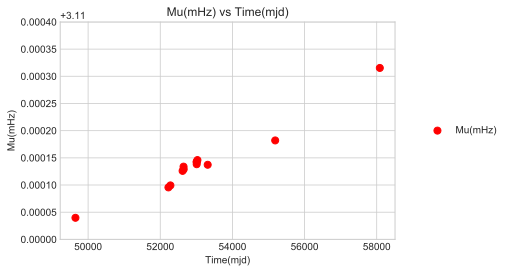

In [288]:
filename=mutime
parax='Time(mjd)'
paray='Mu(mHz)'
paralist='Valid'
namelistall=get_namelist(filename,paralist)
namelist=['yes']

plt.figure()
fit_x=np.logspace(30,38,base=10)
fit_y=pow(fit_x,0.61)*pow(10,29.65+0.15-0.61*36.32)

for i,m,c,in zip(namelist,marker[:len(namelist)],color[:len(namelist)]):
    x=filename[filename[paralist]==i][parax]
    y=filename[filename[paralist]==i][paray]
    plt.scatter(x,y,marker=m,color=c,s=50)#,s=(x+1)*20)
    plt.ylim(3.11,3.1104)
    #plt.xscale('log')
    #plt.yscale('log')
#plt.plot(fit_x,fit_y)
plt.xlabel(parax)
plt.ylabel(paray)
plt.title('%s vs %s'%(paray,parax))
plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5),ncol=1)
plt.grid(True)
plt.savefig('MutimeofHMCNC_fit.png')
plt.show()


In [295]:
x=filename[filename[paralist]=='yes'][parax]
y=filename[filename[paralist]=='yes'][paray]

49648.900000000001

In [ ]:
def mudotdottime(t,mudot,muzero,mudotdot):
    #mudotdot=0
    tzero=t[0]
    return muzero+(t-tzero)*mudot*86400+0.5*mudotdot*(t-tzero)**2*86400**2

def mudottime(t,mudot,muzero):
    #mudotdot=0
    tzero=t[0]
    return muzero+(t-tzero)*mudot*86400

mudot_mHz 3.72763755637e-13
muzero_mHz 3.11002838101 t_zero 49648.9
error [  2.21510634e-14   7.52522504e-06]


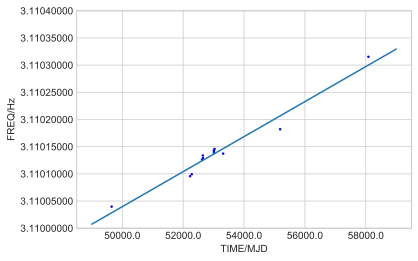

In [305]:
popt,pcov=curve_fit(mudottime,x,y)
perr=np.sqrt(np.diag(pcov))
print('mudot_mHz',popt[0])
print('muzero_mHz',popt[1],'t_zero',x[0])
print('error',perr)
t=np.linspace(49000,59000,100)
tfit=popt[1]+(t-x[0])*popt[0]*86400

plt.scatter(x,y,s=10,c='b',marker='.')
plt.plot(t,tfit)
plt.ylim(3.11,3.1104)
plt.xlabel("TIME/MJD")
plt.ylabel("FREQ/Hz")
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.8f'))

mudot_mHz 2.83936445333e-13
muzero_mHz 3.11004187295 t_zero 49648.9
mudotdot_mHz 2.29450886747e-22
error [  6.15523757e-14   1.13021004e-05   1.49567981e-22]


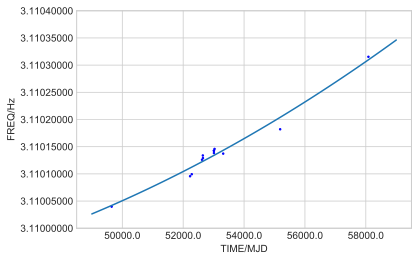

In [306]:
popt,pcov=curve_fit(mudotdottime,x,y)
perr=np.sqrt(np.diag(pcov))
print('mudot_mHz',popt[0])
print('muzero_mHz',popt[1],'t_zero',x[0])
print('mudotdot_mHz',popt[2])

print('error',perr)
t=np.linspace(49000,59000,100)
tfit=popt[1]+(t-x[0])*popt[0]*86400+0.5*popt[2]*(t-x[0])**2*86400**2

plt.scatter(x,y,s=10,c='b',marker='.')
plt.plot(t,tfit)
plt.ylim(3.11,3.1104)
plt.xlabel("TIME/MJD")
plt.ylabel("FREQ/Hz")
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.8f'))